# Kaggle - Titanic Data Competition

<img src="assets/titanic.jpeg"/>

In [209]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Cleaning/Preprocessing
* It appears there are only 2 features that have a high volume of NaN columns. They are relatively inconsequential features since we will not use them to train our ML model. Thus, we will choose to drop these columns.
* Since we would like to feed our model information about a person's gender, we will use dummy encoding to map integral values to each binary string classifier {"female": 1, "male": 0}

In [210]:
df = pd.read_csv("DATA/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [212]:
pd.options.mode.chained_assignment = None

df["Sex Encoded"] = pd.get_dummies(df["Sex"])["female"]
df = df.drop(["Age", "Cabin", "Sex"], axis=1)

df

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Sex Encoded
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,C,0


# Exploratory Data Analysis w/ Titanic Data
We will perform some exploratory data analysis with our current data to gain insight on feature distributions, explore relationships between features, and figure out how we should proceed with our feature selection process.

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

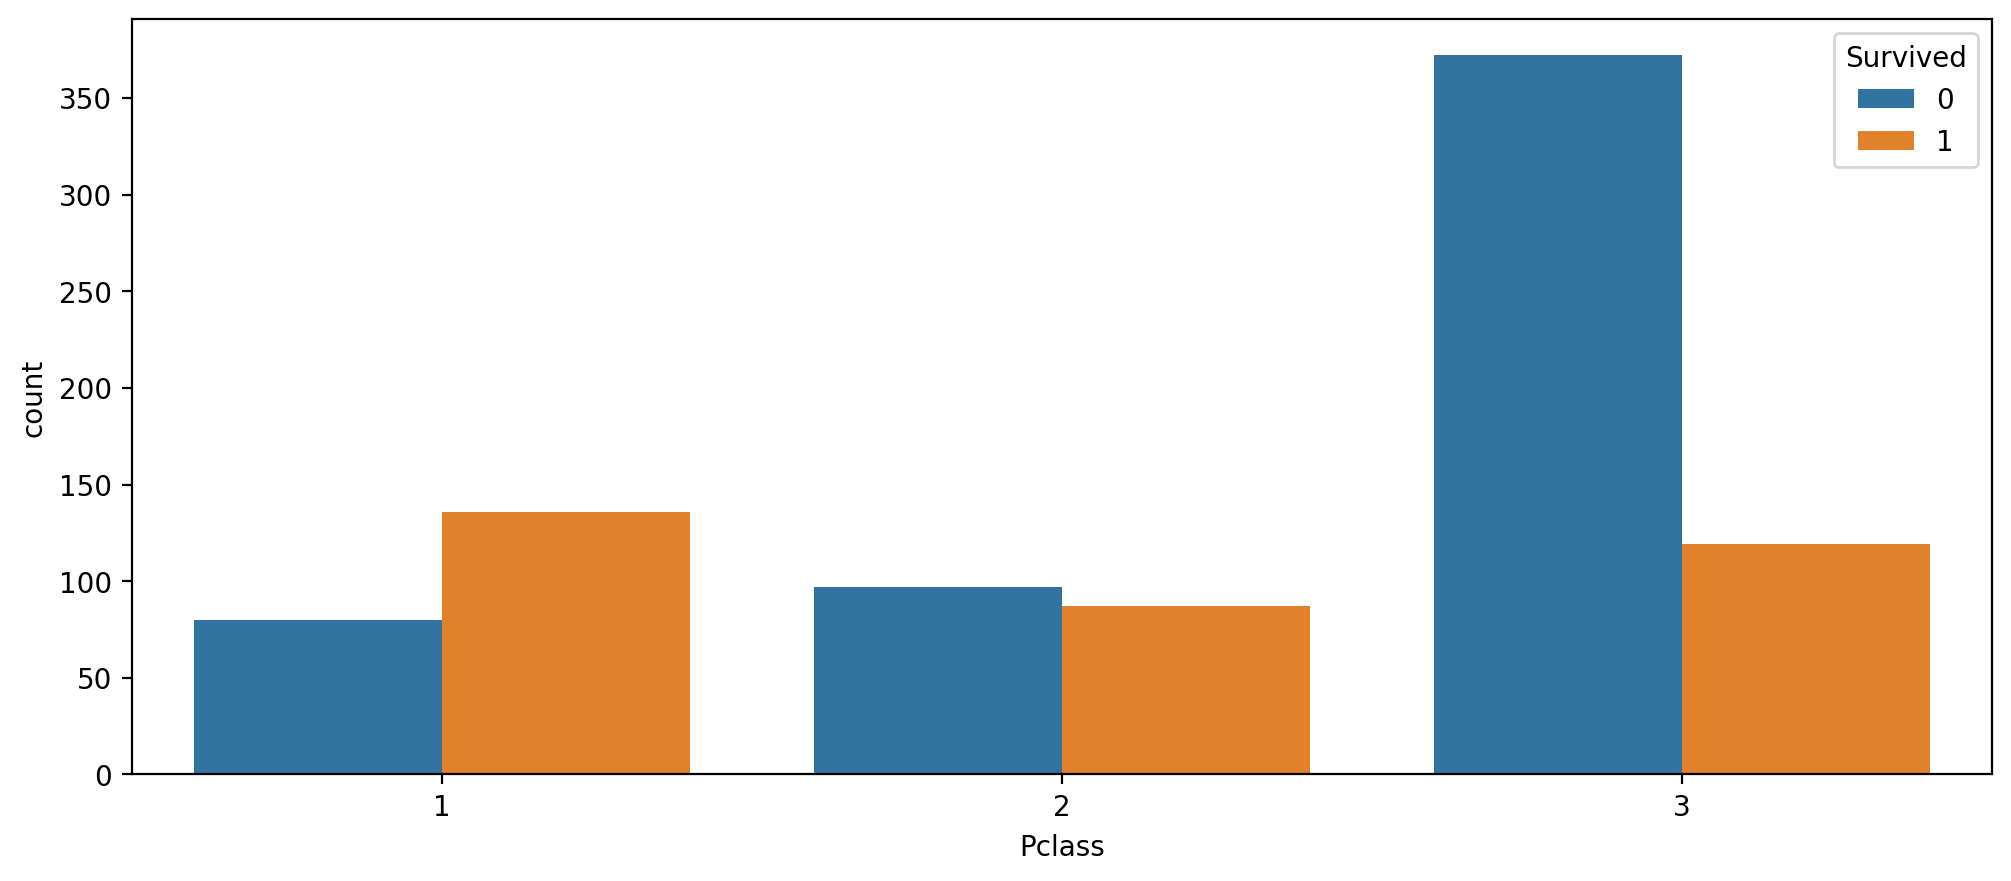

In [214]:
plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(x="Pclass", data=df, hue="Survived")
plt.show()

In [215]:
df.groupby("Pclass").mean()["Survived"]

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

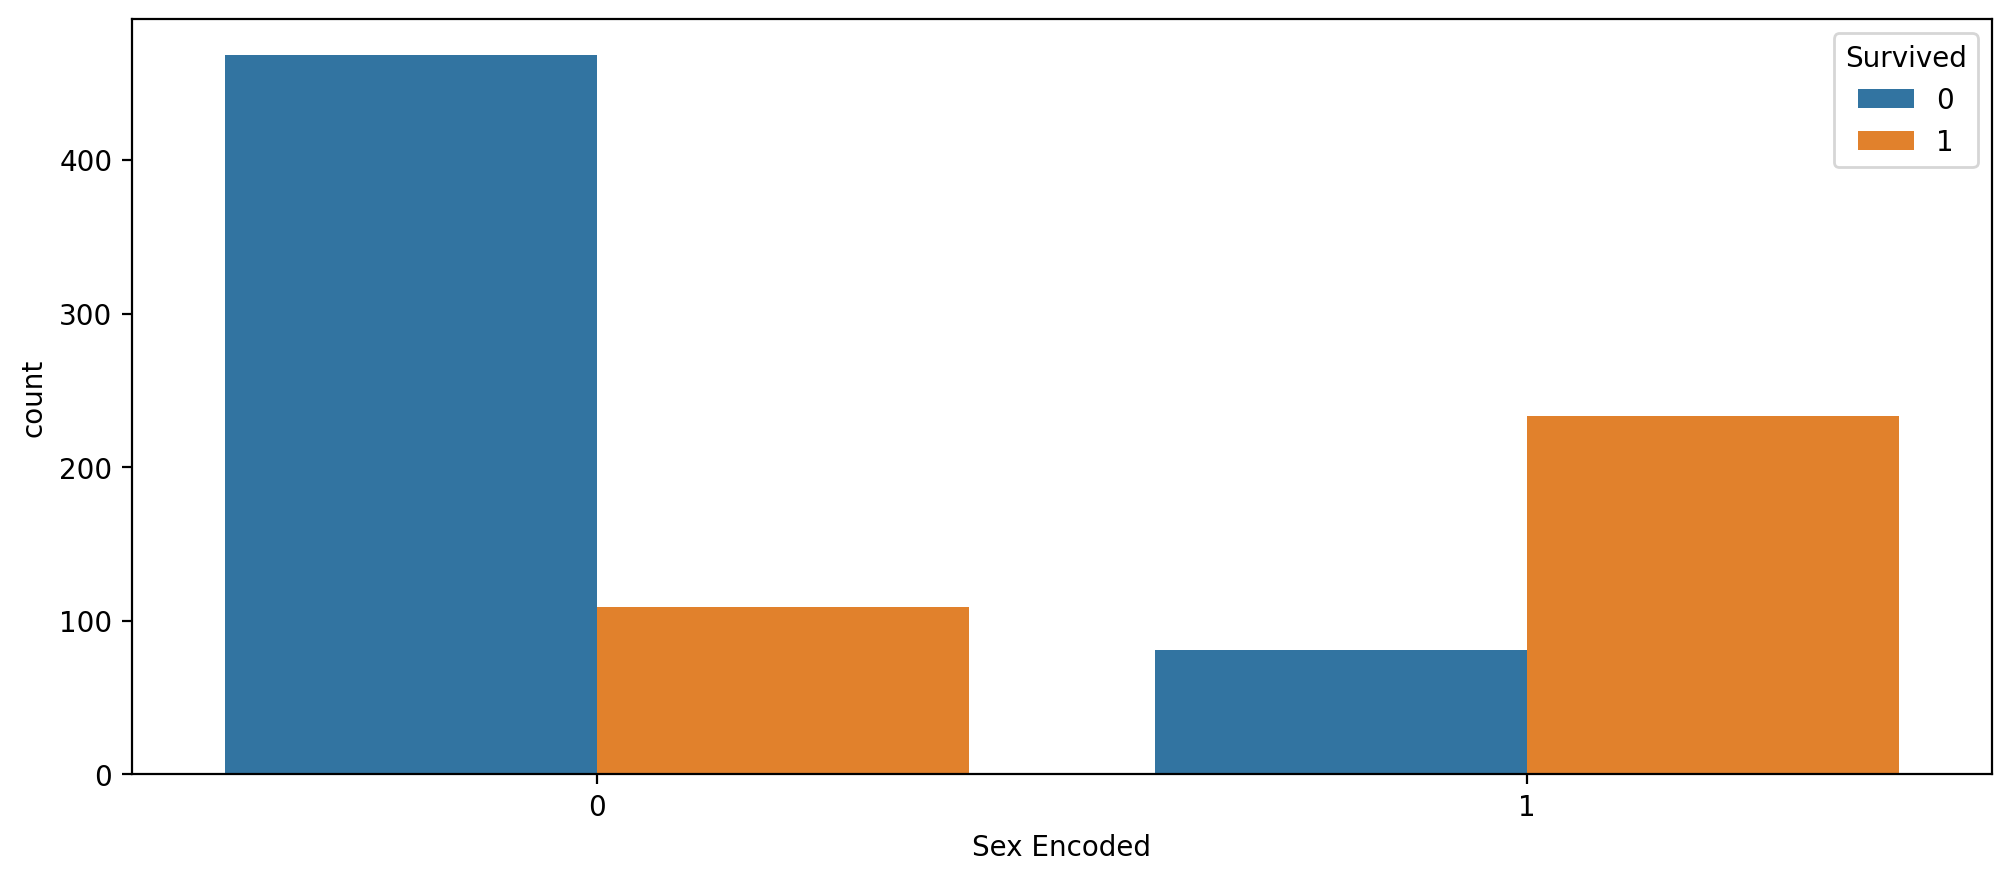

In [216]:
plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(x="Sex Encoded", data=df, hue="Survived")
plt.show();

In [217]:
df.groupby("Sex Encoded").mean()["Survived"]

Sex Encoded
0    0.188908
1    0.742038
Name: Survived, dtype: float64

It appears as though a person's gender and socioeconomic standing was a decent predictor of weather or not they survived. It also appears that a person's number of parents and/or children seemed to garner a slightly higher survival rate.

In [218]:
df.groupby(["Pclass", "Sex Encoded"]).mean()["Survived"]

Pclass  Sex Encoded
1       0              0.368852
        1              0.968085
2       0              0.157407
        1              0.921053
3       0              0.135447
        1              0.500000
Name: Survived, dtype: float64

In [219]:
df.groupby(["Pclass", "Parch"]).mean()["Survived"]

Pclass  Parch
1       0        0.607362
        1        0.677419
        2        0.761905
        4        0.000000
2       0        0.358209
        1        0.750000
        2        0.812500
        3        1.000000
3       0        0.225722
        1        0.363636
        2        0.255814
        3        0.333333
        4        0.000000
        5        0.200000
        6        0.000000
Name: Survived, dtype: float64

# MODEL TRAINING
* Feature Selection
* Dummy Encoding for cateogrical features
* LogsticRegressionCV Model
* Potentially Adjusting Hyperparameters

In [220]:
# DATA INTERPOLATION CAUSED OVERALL DECREASE IN EFFICACY
# Might have been due to my process of interpolation (Interpolating with weighted frequency)

features = df[["Pclass", "Parch", "Sex Encoded", "Survived"]]
features.tail()

,Pclass,Parch,Sex Encoded,Survived
886,2,0,0,0
887,1,0,1,1
888,3,2,1,0
889,1,0,0,1
890,3,0,0,0


In [221]:
features.head()

,Pclass,Parch,Sex Encoded,Survived
0,3,0,0,0
1,1,0,1,1
2,3,0,1,1
3,1,0,1,1
4,3,0,0,0


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X = features.drop("Survived", axis=1)
y = features["Survived"]

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [227]:
from sklearn.linear_model import LogisticRegressionCV

In [228]:
log_cv_model = LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100],
                                    cv=5)

In [229]:
log_cv_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], cv=5)

In [230]:
log_cv_model.coef_, log_cv_model.C_

(array([[-0.91330166, -0.12902594,  2.57015651]]), array([1.]))

In [231]:
y_pred = log_cv_model.predict(X_test)
y_pred_prob = log_cv_model.predict_proba(X_test)

In [232]:
print("For some sample entry,")
print("Model Prediction: ", y_pred[0])
print("Likelihood of Prediction", y_pred_prob[0])

For some sample entry,
Model Prediction:  0
Likelihood of Prediction [0.90150576 0.09849424]


# Evaluation Metrics Analysis for our LogisticCV Classification Model
* Using accuracy score to use as a base metric for later analysis
* Using confusion matrix visuals to show the True Positives, True Negatives, Type I Errors, and Type II Errors
* Using Precision and Recall to validate our accuracy score
    1. **Precision**: Reveals model metric for correctly identifying actual positives and negatives, given the model predicted positive. ($\frac{\text{TP}}{\text{TP} + \text{FP}}$)
    2. **Recall**: Reveals model metric for correctly identifying actual positives. ($\frac{\text{TP}}{\text{TP} + \text{FN}}$)
* NOTES: 
    * FP = False Positive = Type I Error
    * FN = False Negative = Type II Error

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [234]:
y_test.head().values, y_pred[0:5]

(array([1, 0, 0, 1, 1]), array([0, 0, 0, 1, 1]))

In [235]:
accuracy_score(y_test, y_pred)

0.8111111111111111

In [236]:
confusion_matrix(y_test, y_pred)

array([[45,  9],
       [ 8, 28]])

In [237]:
from sklearn.metrics import plot_confusion_matrix

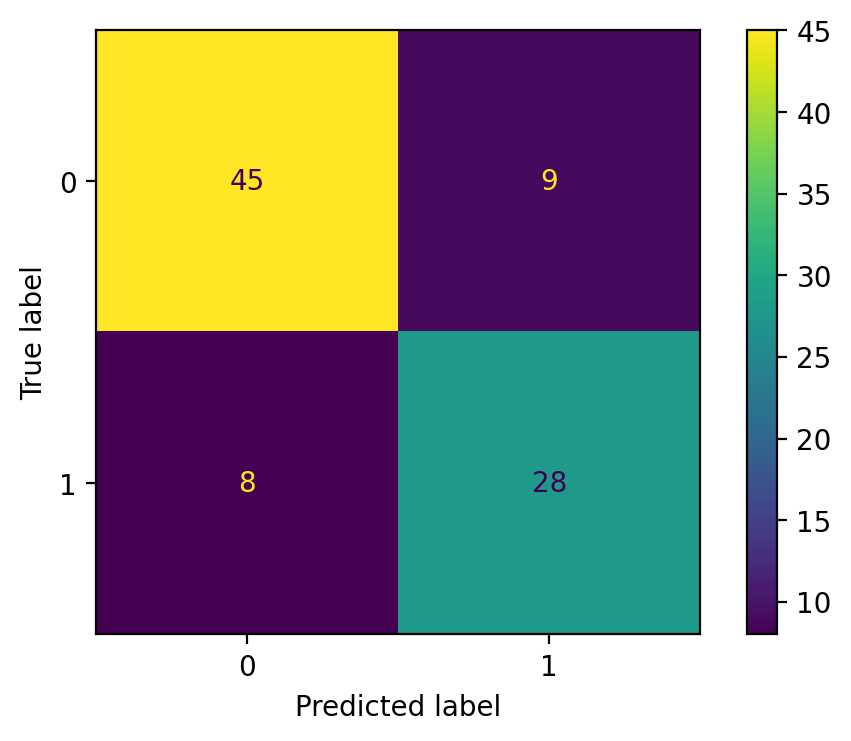

In [238]:
fig, ax = plt.subplots(dpi=200)
plot_confusion_matrix(log_cv_model, X_test, y_test, ax=ax)
plt.show();

In [239]:
from sklearn.metrics import precision_score, recall_score

In [240]:
prec, rec = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
prec, rec

(0.7567567567567568, 0.7777777777777778)

# Final Model Creation and Test
* We will now fit our entire training Data Set to a final LogisticRegressionCV model.
* We will import the test Data and perform one final hold one out 5-fold cross validation procedure.

In [241]:
# Create features df 

features = df[["Pclass", "Sex Encoded", "Parch", "Survived"]]
features

,Pclass,Sex Encoded,Parch,Survived
0,3,0,0,0
1,1,1,0,1
2,3,1,0,1
3,1,1,0,1
4,3,0,0,0
...,...,...,...,...
886,2,0,0,0
887,1,1,0,1
888,3,1,2,0
889,1,0,0,1


In [242]:
# Create X and y same as before

X = features.drop("Survived", axis=1)
y = features["Survived"]

In [243]:
# Fit our CV Model with the most optimal performing C-value and default 5-fold Cross Validation

final_log_cv_model = LogisticRegressionCV(cv=5)

In [244]:
# Fit our ENTIRE TEST DATA SET to the final model, no need for train_test_split.
final_log_cv_model.fit(X, y)

LogisticRegressionCV(cv=5)

In [245]:
test = pd.read_csv("DATA/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [246]:
test["Sex Encoded"] = pd.get_dummies(test["Sex"])["female"]

final_features = test[["Pclass", "Sex Encoded", "Parch"]]
final_features

,Pclass,Sex Encoded,Parch
0,3,0,0
1,3,1,0
2,2,0,0
3,3,0,0
4,3,1,1
...,...,...,...
413,3,0,0
414,1,1,0
415,3,0,0
416,3,0,0


In [247]:
final_y_pred = final_log_cv_model.predict(final_features)

In [248]:
# No further analysis is done, we submit the predictions for a true evaluation on unseen data
results_df = pd.DataFrame()

results_df["PassengerId"] = test["PassengerId"]
results_df["Survived"] = final_y_pred

results_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [249]:
results_df = results_df.set_index("PassengerId")
results_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [250]:
results_df.to_csv("submission.csv")